In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [2]:
df_clust = joblib.load('salidas/df_WithTarget.pkl')
df_clust.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,0.153005,0.016528,0.099691,0.028169,0.000000,0.105263,0.860918,0.473684,0.965517,0.620690,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.393443,0.138818,0.016119,0.394366,0.555556,0.421053,0.325016,0.684211,0.000000,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.615665,0.391192,0.591818,0.873239,0.555556,0.368421,0.047852,0.315789,0.862069,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.114754,0.463579,0.108542,0.507042,1.000000,0.000000,0.965361,0.263158,0.758621,0.103448,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.918033,0.504890,0.102869,0.760563,0.111111,0.526316,0.364656,0.947368,0.655172,0.172414,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
df_clust = df_clust.drop(columns=['NoPaidPerc'])

## <font color = '157699'> Gráfico de inercia

In [4]:
# Número optimo de K
inertia_list = []

for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init= 'k-means++' , random_state=3)
    kmeans.fit(df_clust)
    inertia_list.append(kmeans.inertia_)

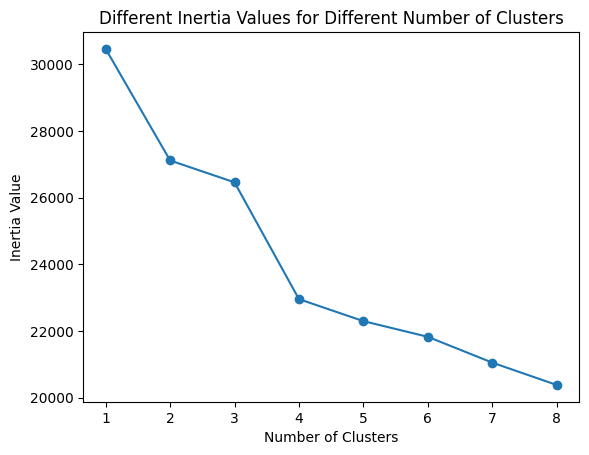

In [5]:
# plot the inertia curve
plt.plot(range(1,9),inertia_list)
plt.scatter(range(1,9),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

## <font color = '157699'> Método del Codo

In [6]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": 'random', "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 9):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_clust)
  sse.append(kmeans.inertia_)

C:\Users\leeon\AppData\Local\Temp\ipykernel_16928\2901427204.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


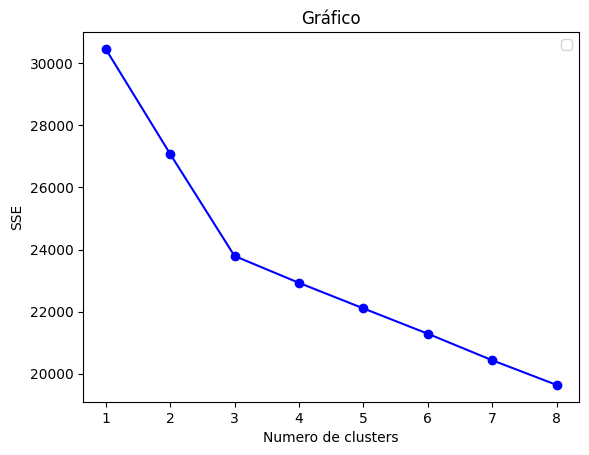

In [7]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,9), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

## <font color = '157699'> Coeficiente de Silueta

In [8]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 9):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_clust)
  score = silhouette_score(df_clust, kmeans.labels_)
  silhouette_coefficients.append(score)

C:\Users\leeon\AppData\Local\Temp\ipykernel_16928\1585512494.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


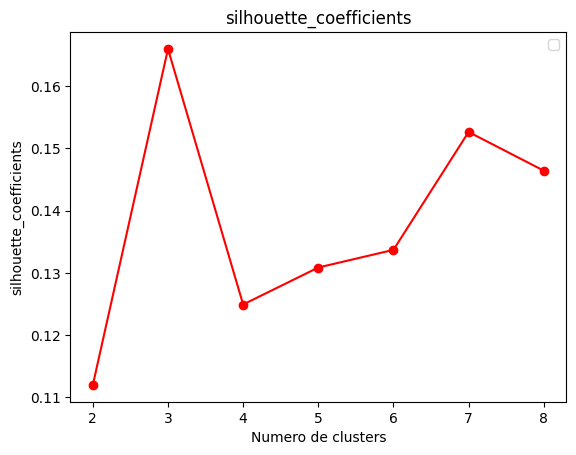

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,9), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

plt.show()

In [10]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 9),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

3

## <font color = '157699'> Modelo KMeans

In [11]:
#Modelo kmeans
kmeans = KMeans(init="k-means++",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(df_clust)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
# metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(df_clust, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df_clust, kmeans.labels_))

[[ 5.02839387e-01  5.03755450e-01  5.07401095e-01  4.81855000e-01
   5.00248830e-01  4.96424699e-01  4.98390335e-01  4.95104587e-01
   5.02682221e-01  4.95649756e-01  1.00000000e+00  4.38538095e-15
   5.55111512e-17  2.55598686e-01  2.59181845e-01  2.48432368e-01
   2.36787101e-01  2.62765004e-01  2.40668856e-01  2.57091669e-01
   2.39474470e-01]
 [ 5.05580616e-01  5.00049388e-01  4.97308389e-01  5.00828138e-01
   5.03906883e-01  4.99608373e-01  5.01092869e-01  5.07732711e-01
   5.00216335e-01  4.96282060e-01 -3.38618023e-15  3.83026943e-15
   1.00000000e+00  2.50948351e-01  2.44820543e-01  2.55617158e-01
   2.48613948e-01  2.51240152e-01  2.36941932e-01  2.48322148e-01
   2.63495769e-01]
 [ 5.08908595e-01  4.95336253e-01  4.93007163e-01  5.05535071e-01
   4.96794872e-01  4.96441165e-01  4.91946342e-01  4.95053546e-01
   5.07551125e-01  5.00010696e-01 -3.33066907e-15  1.00000000e+00
  -6.66133815e-16  2.58995037e-01  2.56823821e-01  2.41935484e-01
   2.42245658e-01  2.46588089e-01  2.4

In [12]:
#Predecir valores de etiquetas
tablafinal = df_clust.copy()
cluster = kmeans.fit_predict(df_clust)
tablafinal["cluster"] = cluster

In [13]:
tablafinal["cluster"].value_counts()

cluster
1    3427
0    3349
2    3224
Name: count, dtype: int64

## <font color = '157699'> PCA

In [14]:
pca = PCA(n_components=3).fit(df_clust)
pca.n_components_

3

In [15]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance

,Varianza explicada (%)
0,11.160449
1,10.777654
2,8.459194


In [16]:
df_clust_pca = pca.fit_transform(df_clust)

In [17]:
# --- Pesos de las variables que componen las componentes principales ---
pesos_pca = pd.DataFrame(pca.components_, columns = df_clust.columns,
             index = ['PC_1', 'PC_2', 'PC_3']).round(2).T

pesos_pca

,PC_1,PC_2,PC_3
CreditScore,0.00,0.01,-0.01
DebtRatio,-0.00,-0.01,-0.00
Assets,-0.01,-0.01,-0.01
Age,0.01,0.02,-0.01
NumberOfDependents,0.00,-0.01,-0.00
NumberOfOpenCreditLinesAndLoans,0.00,-0.00,-0.00
MonthlyIncome,0.00,-0.01,-0.01
NumberOfTimesPastDue,0.01,-0.01,-0.02
EmploymentLength,-0.00,0.01,-0.02
YearsAtCurrentAddress,-0.00,0.00,-0.01


---

In [18]:
#Modelo kmeans
kmeans = KMeans(init='k-means++',
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(df_clust_pca)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(df_clust_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df_clust_pca, kmeans.labels_))

[[-0.64318268 -0.49560472  0.027721  ]
 [-0.13143826  0.8172997  -0.03194286]
 [ 0.75219602 -0.28456201  0.00296064]]
Numero de iteraciones:  3
Inertia:  2620.4922054505387
Silhouette Score:  0.6253947718307634
Calinski harabasz score:  12664.95102459294


In [19]:
#Predecir valores de etiquetas
cluster_2 = kmeans.fit_predict(df_clust_pca)
tablafinal["cluster_2"] = cluster_2

In [20]:
tablafinal["cluster_2"].value_counts()

cluster_2
2    3427
0    3349
1    3224
Name: count, dtype: int64

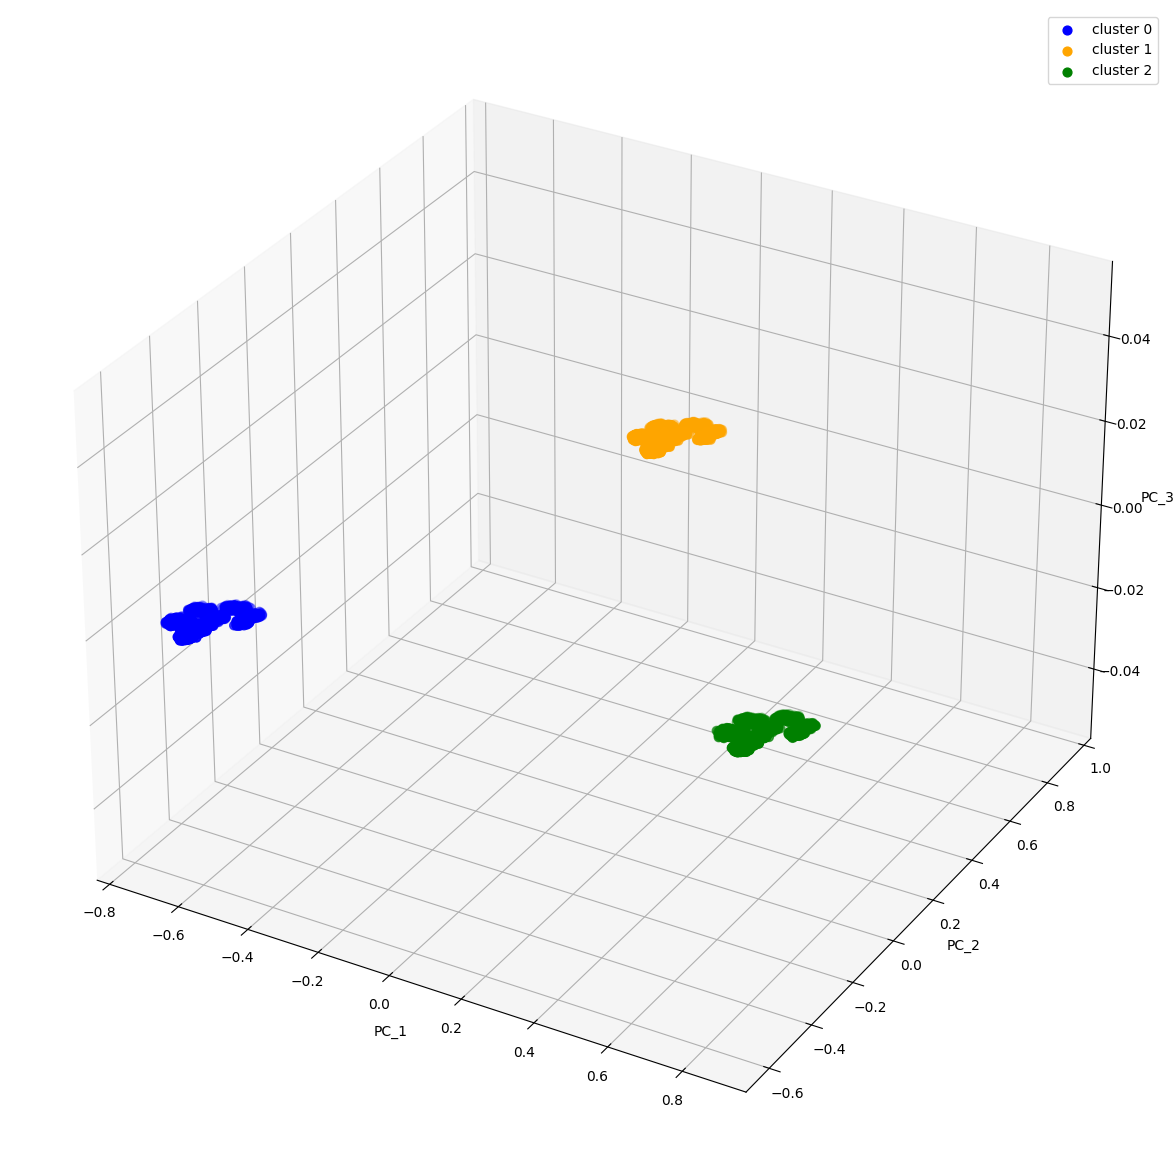

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clust_pca[cluster_2 == 0,0],df_clust_pca[cluster_2== 0,1], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df_clust_pca[cluster_2 == 1,0],df_clust_pca[cluster_2== 1,1], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(df_clust_pca[cluster_2 == 2,0],df_clust_pca[cluster_2== 2,1], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')
ax.legend()
plt.show()

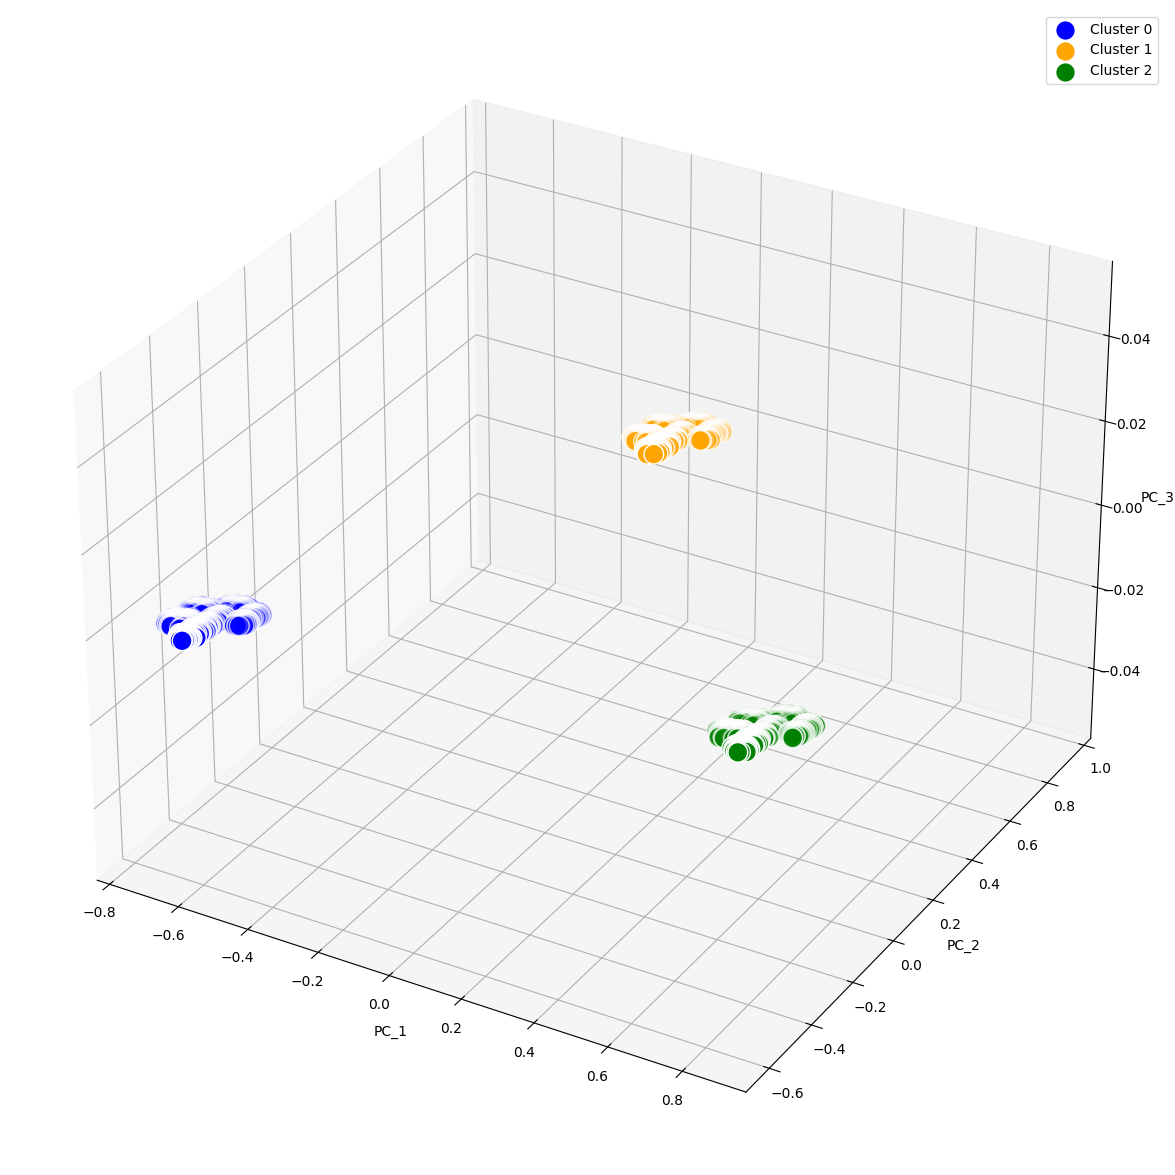

In [28]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Agregar puntos de los diferentes clústeres con bordes blancos
ax.scatter(df_clust_pca[cluster_2 == 0, 0], df_clust_pca[cluster_2 == 0, 1], 
           s=200, color='blue', edgecolors='white', label="Cluster 0")
ax.scatter(df_clust_pca[cluster_2 == 1, 0], df_clust_pca[cluster_2 == 1, 1], 
           s=200, color='orange', edgecolors='white', label="Cluster 1")
ax.scatter(df_clust_pca[cluster_2 == 2, 0], df_clust_pca[cluster_2 == 2, 1], 
           s=200, color='green', edgecolors='white', label="Cluster 2")

# Etiquetas de los ejes
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


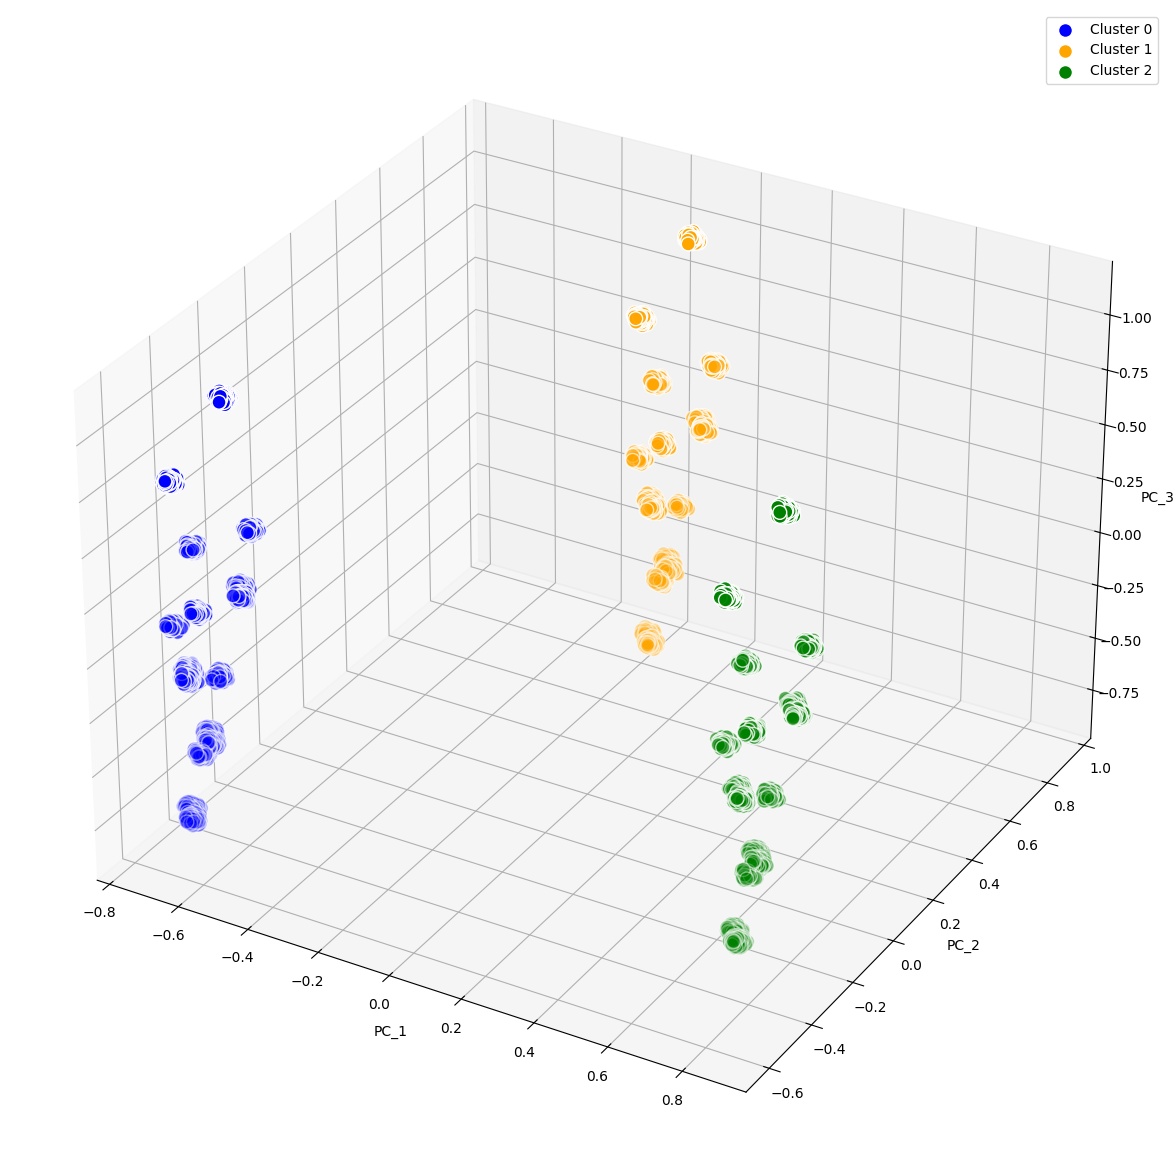

In [29]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Agregar puntos de los diferentes clústeres con bordes blancos
ax.scatter(df_clust_pca[cluster_2 == 0, 0], df_clust_pca[cluster_2 == 0, 1], 
           df_clust_pca[cluster_2 == 0, 2], s=100, color='blue', edgecolors='white', label="Cluster 0")
ax.scatter(df_clust_pca[cluster_2 == 1, 0], df_clust_pca[cluster_2 == 1, 1], 
           df_clust_pca[cluster_2 == 1, 2], s=100, color='orange', edgecolors='white', label="Cluster 1")
ax.scatter(df_clust_pca[cluster_2 == 2, 0], df_clust_pca[cluster_2 == 2, 1], 
           df_clust_pca[cluster_2 == 2, 2], s=100, color='green', edgecolors='white', label="Cluster 2")

# Etiquetas de los ejes
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


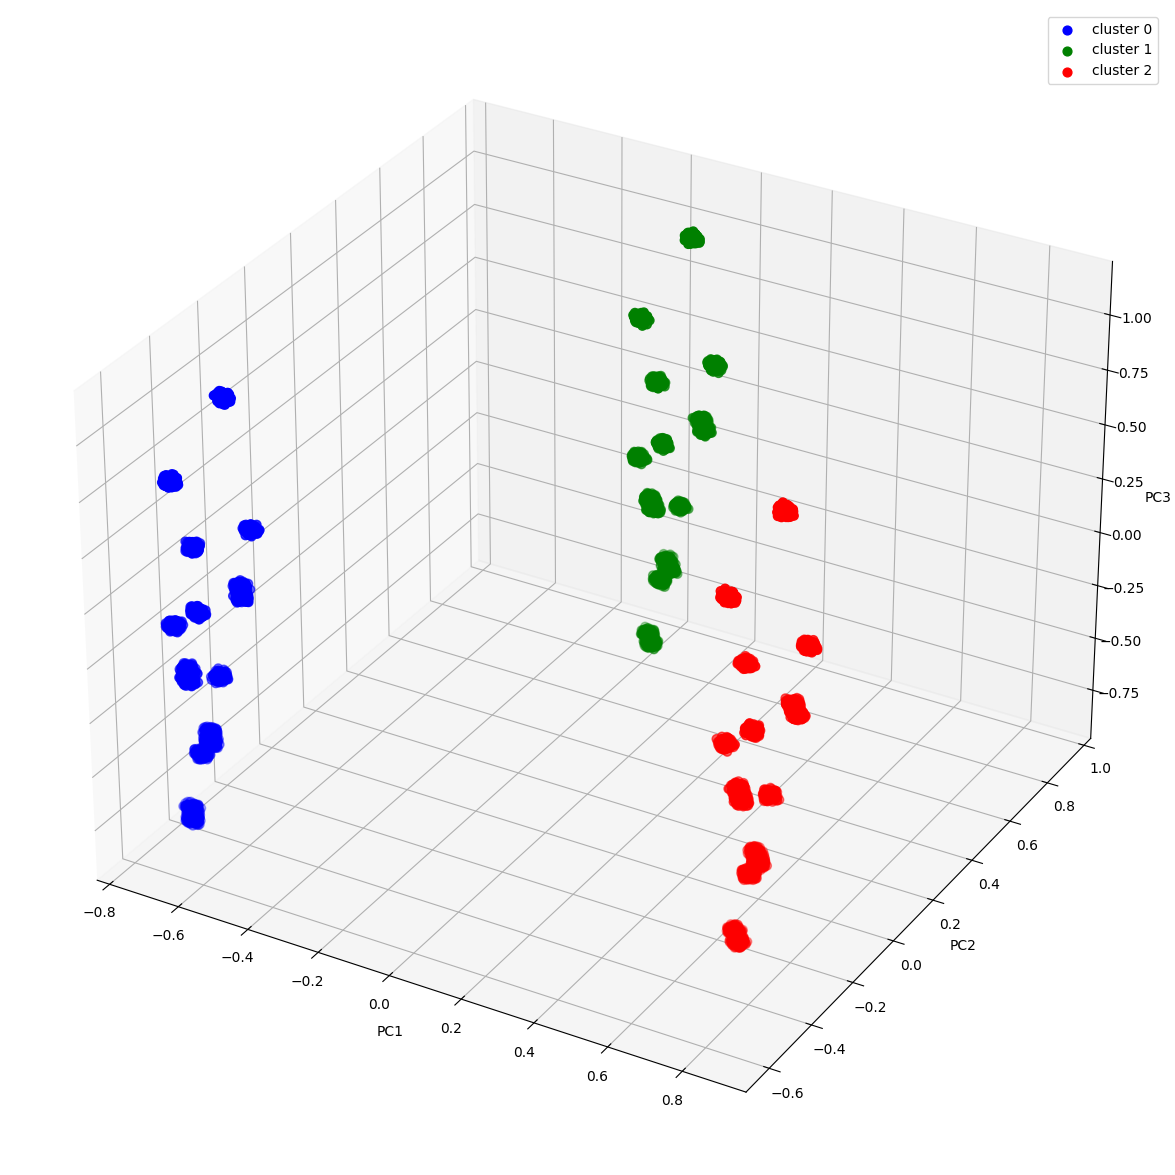

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(X, cluster_labels):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    colors = {0: 'blue', -1: 'orange', 1: 'green', 2: 'red', 3: 'purple', 4: 'yellow', 5: 'cyan', 6: 'magenta', 7: 'brown'}  # Asigna colores a cada clúster
    for cluster_label, color in colors.items():
        if cluster_label in cluster_labels:
            ax.scatter(X[cluster_labels == cluster_label, 0], X[cluster_labels == cluster_label, 1], X[cluster_labels == cluster_label, 2], s=40, color=color, label=f'cluster {cluster_label}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()

# Cluster_4 contiene los etiquetas de los clústeres
plot_3d_scatter(df_clust_pca, cluster_2)

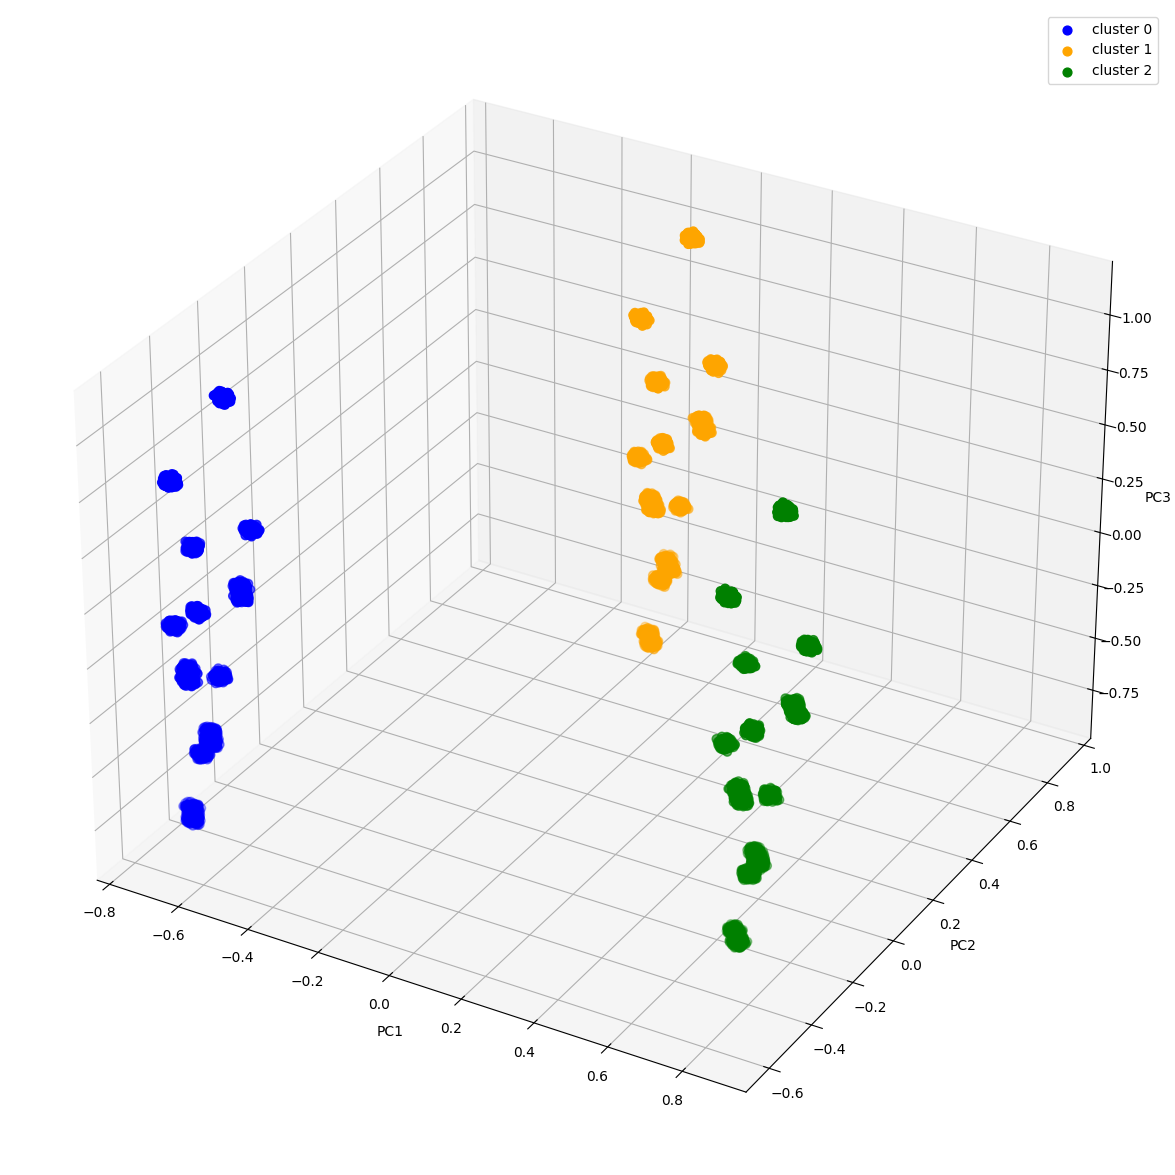

In [24]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clust_pca[cluster_2 == 0,0],df_clust_pca[cluster_2 == 0,1],df_clust_pca[cluster_2 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df_clust_pca[cluster_2 == 1,0],df_clust_pca[cluster_2 == 1,1],df_clust_pca[cluster_2 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(df_clust_pca[cluster_2 == 2,0],df_clust_pca[cluster_2 == 2,1],df_clust_pca[cluster_2 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()